[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
# feature들을 X에 담아준다.
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
# Outcome을 y에 담아준다.
y = df['Outcome']
y.shape

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.
# 랜덤하게 샘플링하여 가져온다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 최적의 모델 만들기

In [28]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model

DecisionTreeClassifier(max_depth=5, random_state=42)

### 최적의 max_depth 값 찾기

In [34]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


* max_dept가 4일 때 가장 좋은 성능을 가진다.

### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [35]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [36]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [37]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [39]:
clf.best_score_

0.8664934026389444

In [43]:
pd.DataFrame(clf.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.010691,0.001982,0.006692,0.003015,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.011628,0.003723,0.009375,0.002996,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.018448,0.015518,0.006590,0.002810,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.012421,0.002608,0.008811,0.002501,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.010833,0.001478,0.006983,0.001279,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [44]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [45]:
clf.score(X_test, y_test)

0.8701298701298701

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [75]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 3, 11, 12, 12, 17,  4,  5, 11,  6, 13])

In [76]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [77]:
param_distributions = {"max_depth" : max_depth,
                       "max_features" : max_features,
                      "min_samples_split" : list(range(2, 7))}
param_distributions

{'max_depth': array([ 3, 11, 12, 12, 17,  4,  5, 11,  6, 13]),
 'max_features': array([0.74388667, 0.84213719, 0.90393908, 0.83075787, 0.74151865,
        0.88570178, 0.95262935, 0.95382783, 0.74979861, 0.76200083,
        0.82447339, 0.85819504, 0.99526826, 0.92524426, 0.90431624,
        0.74972945, 0.88346056, 0.84447457, 0.90607191, 0.87718216,
        0.89656617, 0.84471824, 0.88539264, 0.9893058 , 0.77932481,
        0.9818719 , 0.94410523, 0.97828507, 0.89458773, 0.72581986,
        0.9923239 , 0.70036152, 0.90480074, 0.99285381, 0.70581914,
        0.84078141, 0.70510552, 0.75765118, 0.81925319, 0.80962237,
        0.81761083, 0.76954696, 0.87568553, 0.72644438, 0.87739794,
        0.84866713, 0.75762143, 0.8529315 , 0.9794762 , 0.76680945,
        0.70249147, 0.78605933, 0.92533939, 0.78559367, 0.99880719,
        0.93261815, 0.9621785 , 0.91167638, 0.96367497, 0.7236667 ,
        0.90118371, 0.87813939, 0.87345726, 0.79576321, 0.87268475,
        0.97253058, 0.8339049 , 0.726

In [82]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                         param_distributions,
                         n_iter=1000,
                         scoring="accuracy",
                         n_jobs=-1,
                         cv=5,
                         random_state=42)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 3, 11, 12, 12, 17,  4,  5, 11,  6, 13]),
                                        'max_features': array([0.74388667, 0.84213719, 0.90393908, 0.83075787, 0.74151865,
       0.88570178, 0.95262935, 0.95382783, 0.74979861, 0.76200083,
       0.82447339, 0.85819504, 0.99526826, 0.92524426, 0.90431624...
       0.80711061, 0.86685097, 0.86960995, 0.83682981, 0.78910609,
       0.80105814, 0.91871803, 0.70113955, 0.98342708, 0.83941008,
       0.94409044, 0.91120257, 0.71729958, 0.95621063, 0.96706805,
       0.99644735, 0.77039181, 0.88721249, 0.8155433 , 0.75128384,
       0.88216004, 0.91362059, 0.94038735, 0.7141666 , 0.75636242,
       0.80013659, 0.75211319, 0.77280533, 0.91399471, 0.77674558]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, s

In [83]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7668094511658401, 'max_depth': 5}

In [84]:
clf.best_score_

0.8697454351592697

In [85]:
clf.score(X_test, y_test)

0.8701298701298701

In [86]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
675,0.006911,0.000644,0.004091,0.002002,4,0.766809,5,"{'min_samples_split': 4, 'max_features': 0.766...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
676,0.009399,0.003778,0.002998,0.000643,4,0.743887,5,"{'min_samples_split': 4, 'max_features': 0.743...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
983,0.008406,0.001850,0.005793,0.004176,4,0.741519,5,"{'min_samples_split': 4, 'max_features': 0.741...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
403,0.007482,0.001473,0.003493,0.001096,2,0.844718,4,"{'min_samples_split': 2, 'max_features': 0.844...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,4
412,0.008876,0.004641,0.003445,0.001054,5,0.779325,4,"{'min_samples_split': 5, 'max_features': 0.779...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,4


## 학습과 예측하기

In [29]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

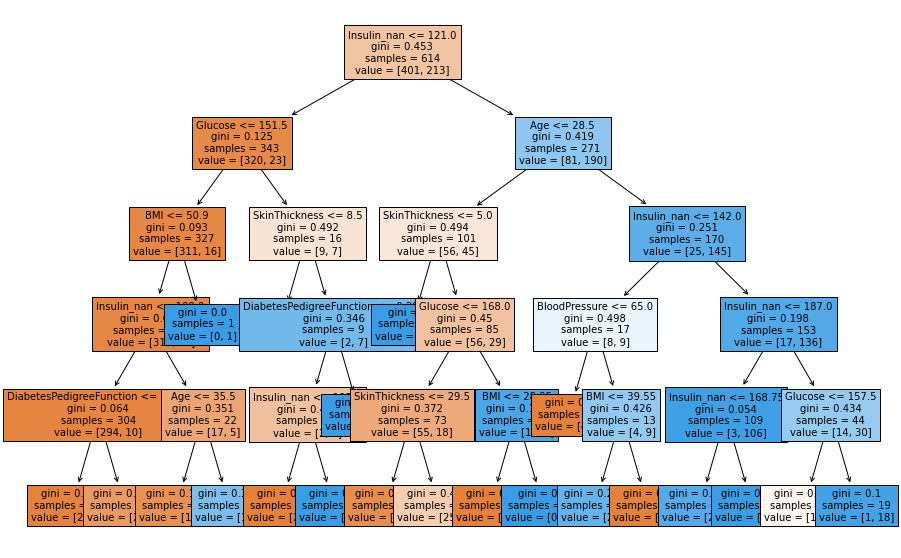

In [30]:
# 그래프로 시각화한다.
feature_names = X_train.columns.tolist()

from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
tree = plot_tree(model, fontsize=10, feature_names = feature_names, filled=True)

* 맨 아래 노드들의 샘플개수가 1이라면 과적합되었을 가능성이 크다.

In [31]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## 정확도(Accuracy) 측정하기

In [32]:
# 다르게 예측한 개수를 구해서 diff_count에 할당해줍니다.
abs(y_predict - y_test).sum()

22

* 지난번과 다르게 예측한 개수가 다르다. train 세트와 test 세트를 나누는 방법이 바뀌었기 때문이다.

In [33]:
# accuracy score를 구합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

85.71428571428571